# Train RNN with Early Stopping

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import sys
sys.path.append('../src/')

In [3]:
import numpy as np
seed = 1234
np.random.seed(seed)
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from IPython.display import SVG
from sklearn.utils import shuffle
from keras.utils.visualize_util import model_to_dot
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [5]:
from gestureai import load_dataset, rnn

# Hypter-parameters

In [6]:
input_dim = 3
timesteps = 40
n_classes = 5
n_files_class = 200
batch_size = 20
max_epochs = 999
n_hidden = 512
rnn_cell = 'GRU'
coreml = True

# Load Datasets

In [7]:
X = load_dataset('../datasets/gesture-3axis-accel.tar.gz')

In [8]:
y = np.array([])
for i in range(n_classes):
    y = np.r_[y, [i] * n_files_class]

In [9]:
X, y = shuffle(X, y)

# Build RNN

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [11]:
model = rnn(rnn_cell=rnn_cell, n_hidden=n_hidden, coreml=True)

In [12]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
reshape_1 (Reshape)              (None, 40, 3)         0           reshape_input_1[0][0]            
____________________________________________________________________________________________________
gru_1 (GRU)                      (None, 512)           792576      reshape_1[0][0]                  
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 5)             2565        gru_1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 5)             0           dense_1[0][0]                    
Total params: 795,141
Trainable params: 795,141
Non-trainable params: 0
___________________

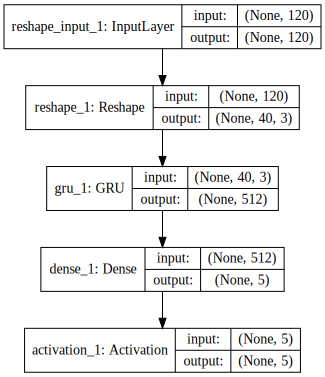

In [13]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

# Train RNN

In [14]:
if coreml:
    X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])

In [15]:
history = model.fit(X, y, batch_size=batch_size, validation_split=0.1, callbacks=[early_stopping], 
                    nb_epoch=max_epochs, verbose=1)

Train on 900 samples, validate on 100 samples
Epoch 1/999
900/900 [==============================] - 2s - loss: 1.6388 - acc: 0.2278 - val_loss: 1.5925 - val_acc: 0.2600
Epoch 2/999
900/900 [==============================] - 1s - loss: 1.6064 - acc: 0.2278 - val_loss: 1.6060 - val_acc: 0.2800
Epoch 3/999
900/900 [==============================] - 1s - loss: 1.6423 - acc: 0.2311 - val_loss: 1.5446 - val_acc: 0.2800
Epoch 4/999
900/900 [==============================] - 1s - loss: 1.5356 - acc: 0.3244 - val_loss: 1.5777 - val_acc: 0.2900
Epoch 5/999
900/900 [==============================] - 1s - loss: 1.4438 - acc: 0.3844 - val_loss: 1.2621 - val_acc: 0.3700
Epoch 6/999
900/900 [==============================] - 1s - loss: 1.3498 - acc: 0.4133 - val_loss: 1.3192 - val_acc: 0.4400
Epoch 7/999
900/900 [==============================] - 2s - loss: 1.3178 - acc: 0.4378 - val_loss: 1.1143 - val_acc: 0.6100
Epoch 8/999
900/900 [==============================] - 2s - loss: 1.1948 - acc: 0.4867

## Plot Accuray

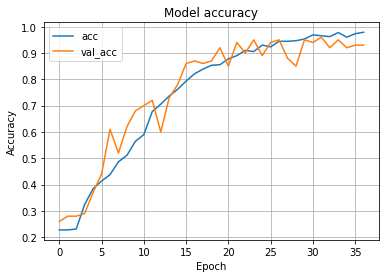

In [16]:
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()

## Plot Loss

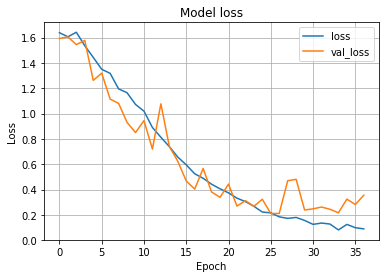

In [17]:
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# Save model

In [18]:
model.save('../models/GestureAI.h5')

In [19]:
model.save_weights('../models/GestureAI_weights.h5')

## Convert Model to .mlmodel

In [20]:
import coremltools

In [21]:
coreml_model =coremltools.converters.keras.convert(model)
coreml_model.author = 'Akimasa KIMURA'
coreml_model.license = 'MIT'
coreml_model.short_description = 'GestureAI'
coreml_model.save('../models/GestureAI.mlmodel')

0 : reshape_input_1, <keras.engine.topology.InputLayer object at 0x7fa3036b0cd0>
1 : reshape_1, <keras.layers.core.Reshape object at 0x7fa3036b0d10>
2 : gru_1, <keras.layers.recurrent.GRU object at 0x7fa3036b0e90>
3 : dense_1, <keras.layers.core.Dense object at 0x7fa3035ef910>
4 : activation_1, <keras.layers.core.Activation object at 0x7fa303489cd0>


---